### Thực hành 1

In [1]:
### Step 1:
import numpy as np
from sklearn.linear_model import LinearRegression
### Step 2:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [ ]:
### Step 3: Tạo mô hình phù hợp
model = LinearRegression()
model.fit(x, y)
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
# copy_X là một Boolean (Đúng là mặc định) quyết định sao chép(Đúng) hay ghi đè các biến đầu vào (Sai);
# fit_intercept là một Boolean (Đúng là mặc định) quyết địnhtính toán khoảng chặn 𝑏₀ (Đúng) hay nó bằng 0 (Sai);
# n_jobs là một số nguyên hoặc Không (mặc định) và đại diện chosố lượng công việc được sử dụng trong tính toán song song. Không cónghĩa là một công việc và -1 để sử dụng các bộ xử lý;
# normalize là một Boolean (False là mặc định) chuẩn hóa cácbiến đầu vào (True) hay (False);
model = LinearRegression().fit(x, y)

In [6]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

#lấy hệ số xác định (𝑅²) với .score () được gọi từ mô hình;
print('intercept:', model.intercept_)

print('slope:', model.coef_)

#thuộc tính của mô hình .intercept_, đại diện cho hệ số 𝑏₀ và.coef_, đại diện cho hệ số 𝑏₁;
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

coefficient of determination: 0.7158756137479542
intercept: 5.633333333333329
slope: [0.54]
intercept: [5.63333333]
slope: [[0.54]]


In [7]:
### Step 5: Dự đoán
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]
[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


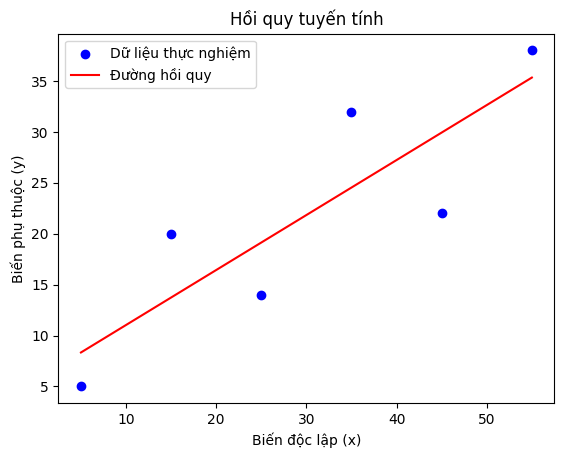

In [8]:
# Vẽ biểu đồ đường hồi quy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Chuẩn bị dữ liệu
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

# Tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(x, y)

# Tính toán dự đoán
y_pred = model.predict(x)

# Vẽ biểu đồ
plt.scatter(x, y, color='blue', label='Dữ liệu thực nghiệm')  # Dữ liệu gốc
plt.plot(x, y_pred, color='red', label='Đường hồi quy')       # Đường hồi quy
plt.title('Hồi quy tuyến tính')
plt.xlabel('Biến độc lập (x)')
plt.ylabel('Biến phụ thuộc (y)')
plt.legend()
plt.show()


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Dữ liệu
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

# Huấn luyện mô hình
model = LinearRegression()
model.fit(x, y)

# Giá trị dự đoán
y_pred = model.predict(x)

# Phần dư
residuals = y - y_pred

# Tìm điểm tốt nhất và xấu nhất
best_point_index = np.argmin(np.abs(residuals))  # Phần dư gần 0 nhất
worst_point_index = np.argmax(np.abs(residuals))  # Phần dư lớn nhất

# Kết quả
print("Giá trị thực tế (y):", y)
print("Giá trị dự đoán (y_pred):", y_pred)
print("Phần dư (residuals):", residuals)
print("Điểm tốt nhất (gần đường hồi quy nhất):")
print(f"x = {x[best_point_index][0]}, y = {y[best_point_index]}, residual = {residuals[best_point_index]}")
print("Điểm xấu nhất (xa đường hồi quy nhất):")
print(f"x = {x[worst_point_index][0]}, y = {y[worst_point_index]}, residual = {residuals[worst_point_index]}")


Giá trị thực tế (y): [ 5 20 14 32 22 38]
Giá trị dự đoán (y_pred): [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
Phần dư (residuals): [-3.33333333  6.26666667 -5.13333333  7.46666667 -7.93333333  2.66666667]
Điểm tốt nhất (gần đường hồi quy nhất):
x = 55, y = 38, residual = 2.6666666666666714
Điểm xấu nhất (xa đường hồi quy nhất):
x = 45, y = 22, residual = -7.93333333333333


Estimated coefficients:
b_0 = 1.2363636363636363  \nb_1 = 1.1696969696969697


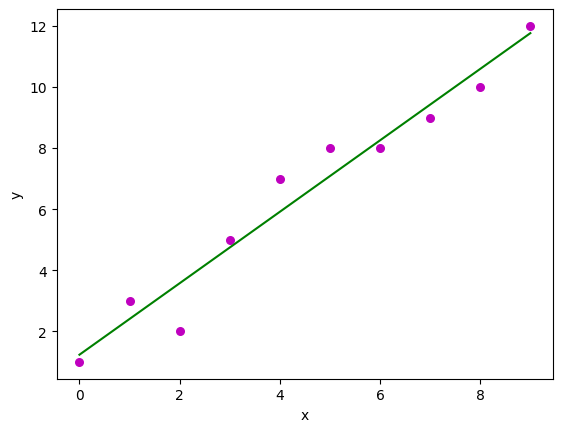

In [10]:
# Câu 2
import numpy as np
import matplotlib.pyplot as plt
def estimate_coef(x, y):
    # Số lượng quan sát/điểm dữ liệu
    n = np.size(x)
    # Tính giá trị trung bình của x và y
    m_x, m_y = np.mean(x), np.mean(y)
    # Tính cross-deviation và deviation x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    # Tính hệ số hồi quy
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return(b_0, b_1)
def plot_regression_line(x, y, b):
    # Vẽ dữ liệu
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    # Dự đoán giá trị
    y_pred = b[0] + b[1]*x
    # Vẽ đường hồi quy
    plt.plot(x, y_pred, color = "g")
    # Đặt nhãn
    plt.xlabel('x')
    plt.ylabel('y')
    # Hiển thị plot
    plt.show()
def main():
    #data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
    # hệ số ước lượng
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \\nb_1 = {}".format(b[0], b[1]))
    # Vẽ đường hồi quy
    plot_regression_line(x, y, b)
if __name__ == "__main__":
    main()

In [13]:
def find_closest_point(x, y, b):
    # Dự đoán giá trị y
    y_pred = b[0] + b[1] * x
    # Tính phần dư
    residuals = y - y_pred
    # Tìm phần dư nhỏ nhất (giá trị tuyệt đối nhỏ nhất)
    min_residual_index = np.argmin(np.abs(residuals))
    return min_residual_index, residuals[min_residual_index]

if __name__ == "__main__":
    # Dữ liệu đầu vào
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # Ước tính hệ số hồi quy
    b = estimate_coef(x, y)

    # Tìm điểm xa nhất
    index_furthest, max_residual = find_furthest_point(x, y, b)
    print(f"Điểm xa nhất là tại index {index_furthest}, với phần dư {max_residual}")
    print(f"Điểm cụ thể: x = {x[index_furthest]}, y = {y[index_furthest]}")

    # Tìm điểm gần nhất
    index_closest, min_residual = find_closest_point(x, y, b)
    print(f"Điểm gần nhất là tại index {index_closest}, với phần dư {min_residual}")
    print(f"Điểm cụ thể: x = {x[index_closest]}, y = {y[index_closest]}")


Điểm xa nhất là tại index 2, với phần dư -1.5757575757575757
Điểm cụ thể: x = 2, y = 2
Điểm gần nhất là tại index 0, với phần dư -0.23636363636363633
Điểm cụ thể: x = 0, y = 1


In [15]:
# CÂU 3:
#Step 1&2: thư viện hàm gói và lớp cung cấp dữ liệu
import numpy as np
from sklearn.linear_model import LinearRegression
x = [[0,1],[5,1],[15,2],[25,5],[35,11],[45,15],[55,34],[60,35]]
y = [4,5,20,14,32,22,38,43]
x, y = np.array(x), np.array(y)
#Step 3: Tạo mô hình và huấn luyện
model = LinearRegression().fit(x, y)
#Step4: Thu nhận kết quả
r_sq = model.score(x, y)
print(f'coefficient of determination:{r_sq}')
print(f'intercept:{model.intercept_}')
print(f'coefficients:{model.coef_}')
#Step 5: Dự đoán
y_pred = model.predict(x)
print(f'predicted response:\n{y_pred}')
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print(f'predicted response:\n{y_pred}')
x_new = np.arange(10).reshape((-1, 2))
print(f'new x:\n{x_new}')
y_new = model.predict(x_new)
print(f'new y:\n{y_new}')


coefficient of determination:0.8615939258756776
intercept:5.52257927519819
coefficients:[0.44706965 0.25502548]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
new x:
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
new y:
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


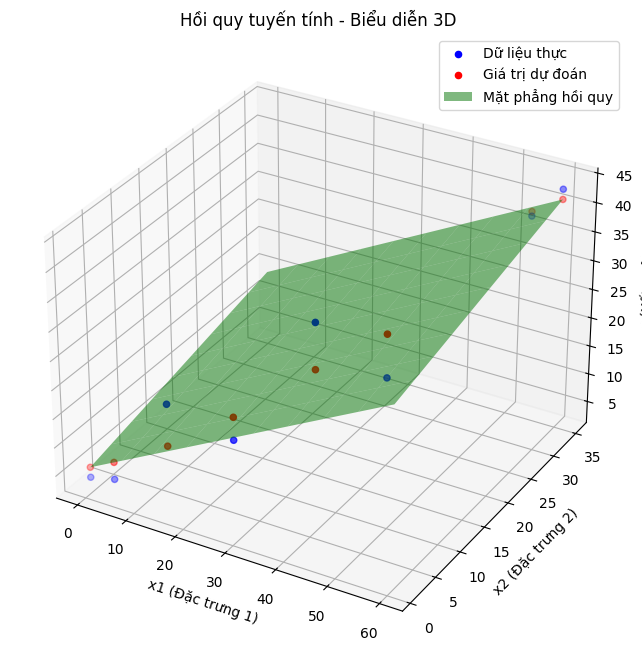

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Tạo figure 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Giá trị thực
ax.scatter(x[:, 0], x[:, 1], y, color='blue', label='Dữ liệu thực')

# Giá trị dự đoán
ax.scatter(x[:, 0], x[:, 1], y_pred, color='red', label='Giá trị dự đoán')

# Đường hồi quy
x1 = np.linspace(min(x[:, 0]), max(x[:, 0]), 10)
x2 = np.linspace(min(x[:, 1]), max(x[:, 1]), 10)
x1, x2 = np.meshgrid(x1, x2)
y_plane = model.intercept_ + model.coef_[0] * x1 + model.coef_[1] * x2
ax.plot_surface(x1, x2, y_plane, alpha=0.5, color='green', label='Mặt phẳng hồi quy')

# Gán nhãn
ax.set_xlabel('x1 (Đặc trưng 1)')
ax.set_ylabel('x2 (Đặc trưng 2)')
ax.set_zlabel('y (Kết quả)')
plt.title('Hồi quy tuyến tính - Biểu diễn 3D')
plt.legend()
plt.show()
